# Stock Market Time Series Forecasting Project

This project analyzes and forecasts stock market data using different time series models: **ARIMA, SARIMA, Prophet, and LSTM**.

 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
import statsmodels.api as sm

In [15]:

from prophet import Prophet


# Load dataset
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()


,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,2508.75,2519.56,2499.57,2507.45,3140794
2023-01-03,2496.69,2511.84,2499.76,2505.38,3614235
2023-01-04,2520.60,2527.47,2507.56,2515.09,1491036
2023-01-05,2537.00,2550.04,2528.76,2537.94,1327304
2023-01-06,2534.91,2542.02,2526.77,2534.43,2852610


## Exploratory Data Analysis

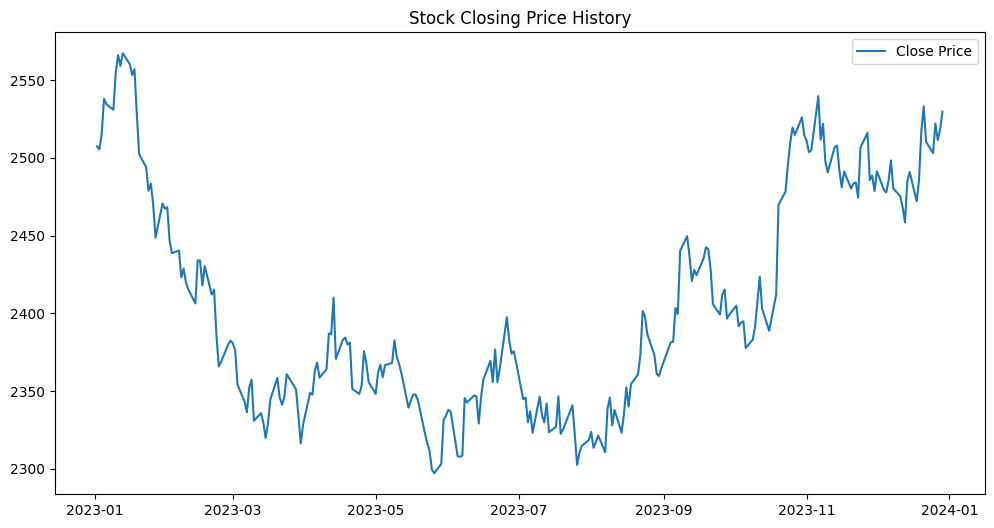

              Open         High          Low        Close        Volume
count   260.000000   260.000000   260.000000   260.000000  2.600000e+02
mean   2404.611962  2417.550808  2392.612923  2404.762269  2.968858e+06
std      70.987687    70.695170    71.442501    70.965734  1.152984e+06
min    2292.000000  2307.710000  2283.990000  2297.100000  1.011303e+06
25%    2347.175000  2360.500000  2334.350000  2346.340000  1.960259e+06
50%    2380.130000  2395.190000  2371.335000  2382.565000  2.912056e+06
75%    2474.270000  2484.910000  2460.487500  2472.600000  3.993822e+06
max    2567.490000  2580.350000  2556.750000  2567.210000  4.981298e+06


In [6]:

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price History')
plt.legend()
plt.show()

print(df.describe())


## Train-Test Split

In [7]:

train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]
print("Train size:", len(train))
print("Test size:", len(test))


Train size: 208
Test size: 52


## ARIMA Model

C:\Users\Paras\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Paras\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Paras\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


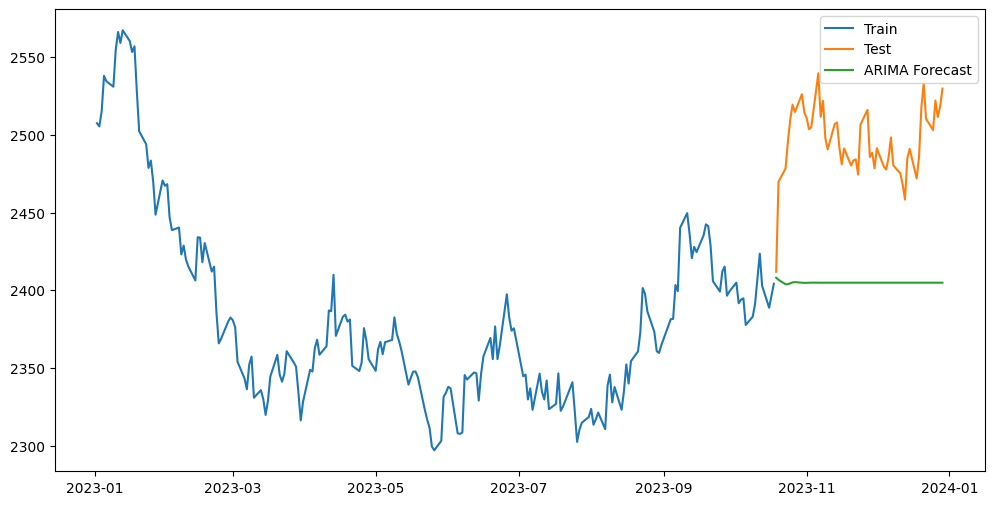

ARIMA RMSE: 93.71728001465492
ARIMA MAE: 91.03098314397513


In [17]:

arima_model = sm.tsa.ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()

rmse_arima = sqrt(mean_squared_error(test, arima_forecast))
mae_arima = mean_absolute_error(test, arima_forecast)
print("ARIMA RMSE:", rmse_arima)
print("ARIMA MAE:", mae_arima)


## SARIMA Model

C:\Users\Paras\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Paras\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


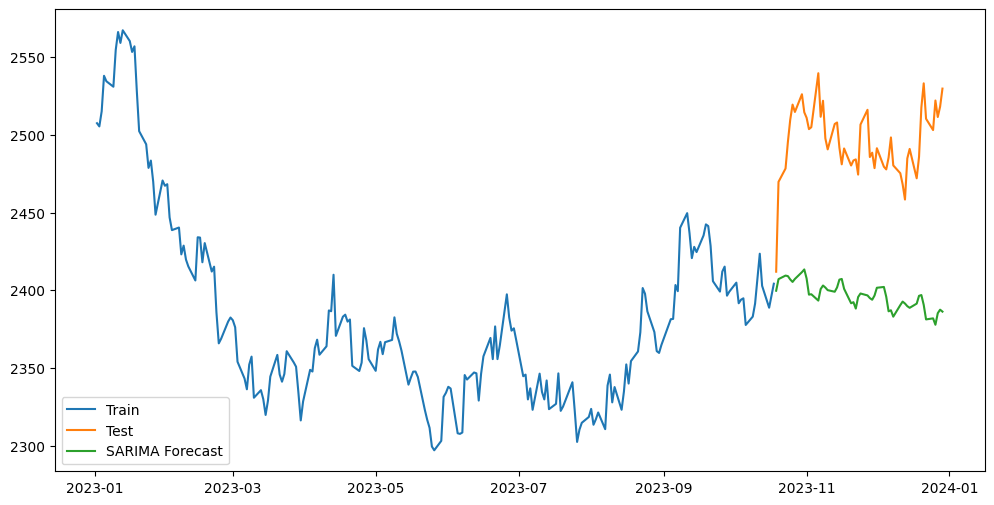

SARIMA RMSE: 102.15850160027321
SARIMA MAE: 99.41790209800858


In [16]:

sarima_model = sm.tsa.statespace.SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)
sarima_forecast = sarima_result.forecast(steps=len(test))

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
plt.legend()
plt.show()

rmse_sarima = sqrt(mean_squared_error(test, sarima_forecast))
mae_sarima = mean_absolute_error(test, sarima_forecast)
print("SARIMA RMSE:", rmse_sarima)
print("SARIMA MAE:", mae_sarima)


## Prophet Model

18:38:36 - cmdstanpy - INFO - Chain [1] start processing
18:38:36 - cmdstanpy - INFO - Chain [1] done processing


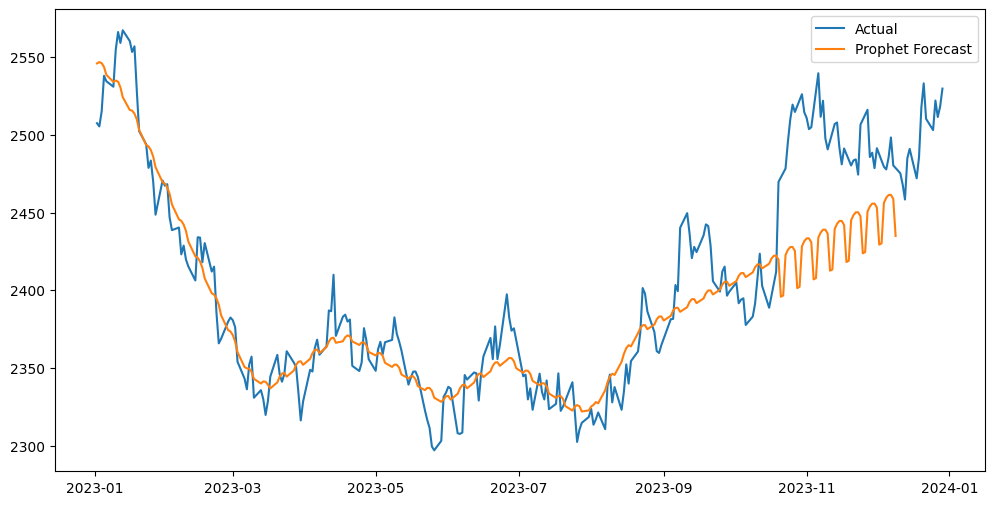

In [10]:

prophet_df = df.reset_index()[['Date','Close']].rename(columns={'Date':'ds','Close':'y'})
prophet_train = prophet_df.iloc[:train_size]
prophet_test = prophet_df.iloc[train_size:]

prophet = Prophet()
prophet.fit(prophet_train)
future = prophet.make_future_dataframe(periods=len(test))
forecast = prophet.predict(future)

plt.figure(figsize=(12,6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast')
plt.legend()
plt.show()


## LSTM Model

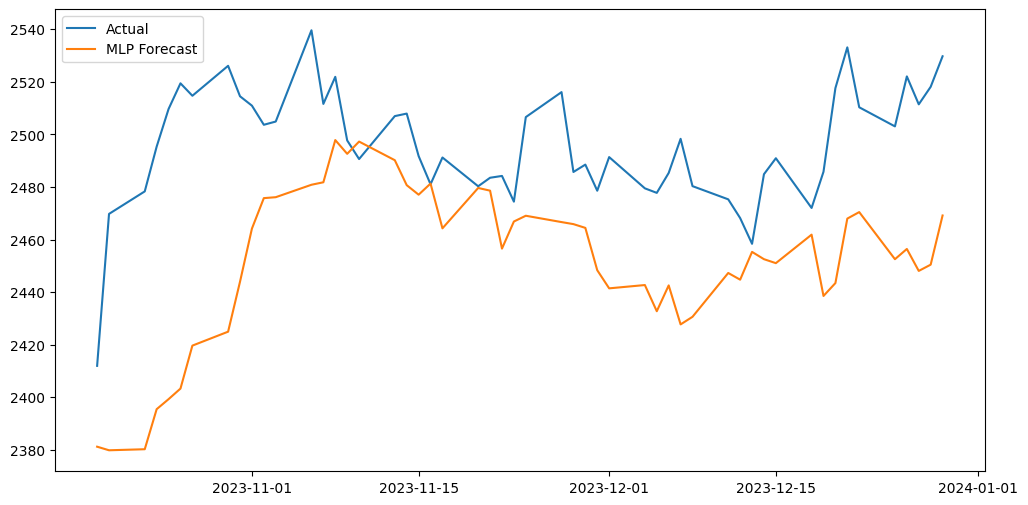

In [11]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Assuming df['Close'] exists
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['Close']])

# Train/Test split
train_size = int(len(scaled_data) * 0.8)
train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

# Prepare dataset with 60-day lookback
X_train, y_train = [], []
for i in range(60, len(train_scaled)):
    X_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Train MLP Regressor
mlp = MLPRegressor(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Prepare test data
inputs = scaled_data[len(scaled_data)-len(test_scaled)-60:]
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

# Predict
predicted_stock_price = mlp.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1,1))

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index[train_size:], df['Close'][train_size:], label='Actual')
plt.plot(df.index[train_size:], predicted_stock_price, label='MLP Forecast')
plt.legend()
plt.show()

